# Predicting Heart Disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

The explored problem is a **binary classification** (a sample can only be one of two things).

The problem is approached with the following machine learning modelling framework:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

More specifically, the following topics are targeted:
* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once a good model has been found, how can one improve it?
* **Feature importance** - since the presence of heart disease is predicted, are there some things which are more important for prediction?
* **Cross-validation** - if one does build a good model, can one be sure it will work on unseen data?
* **Reporting what we've found** - if one had to present its work, what would one show someone?

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data comes from the Cleavland data from UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, the project may be persued.


## 4. Features

**Data dictionary**

The following are the features to be used to predict the target variable (heart disease or no heart disease).

* **age**: Displays the age of the individual (in years).
* **sex**: Displays the gender of the individual using the following format : 1 = male 0 = female.
* **cp**- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic.
* **trestbps**- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* **chol**- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit), above 200 is cause for concern
* **fbs**- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* **restecg**- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
* **thalach**- Max heart rate achieved : displays the max heart rate achieved by an individual.
* **exang**- Exercise induced angina : 1 = yes 0 = no
* **oldpeak**- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* **slope**- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
* **ca**- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* **thal** : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* **target** : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

**Note:** No personal identifiable information (PPI) can be found in the dataset.

In [ ]:
# Creating a data dictionary for further use during the project
data_dictionary = {
"age": "Displays the age of the individual.",
"sex": "Displays the gender of the individual using the following format : 1 = male 0 = female.",
"cp": "Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic.",
"trestbps": "Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.",
"chol": "Serum Cholestrol: displays the serum cholesterol in mg/dl (unit).",
"fbs": "Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes.",
"restecg": "Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy.",
"thalach": "Max heart rate achieved : displays the max heart rate achieved by an individual.",
"exang": "Exercise induced angina : 1 = yes 0 = no.",
"oldpeak": "ST depression induced by exercise relative to rest: displays the value which is an integer or float.",
"slope": "Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart.",
"ca": "Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.",
"thal": "Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising.",
"target": "Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no."
}

## Preparing the tools

The libraries used:

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [ ]:
# Import all the libraries

# Regular EDA (exploraroty data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load data

In [ ]:
df = pd.read_csv("../data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal is to find out more about the data.

1. What question(s) is one trying to solve?
2. What kind of data does one have and how does one treat different types?
3. What's missing from the data and how does one deal with it?
4. Where are the outliers and why should one care about them?
5. How can one add, change or remove features to get more out of its data?

In [ ]:
# Checking the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0


In [ ]:
data_dictionary["target"]

'Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no.'

In [ ]:
# Checking the number of samples of each class
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Since these two values are close to each other, the `target` column can be considered **balanced**.

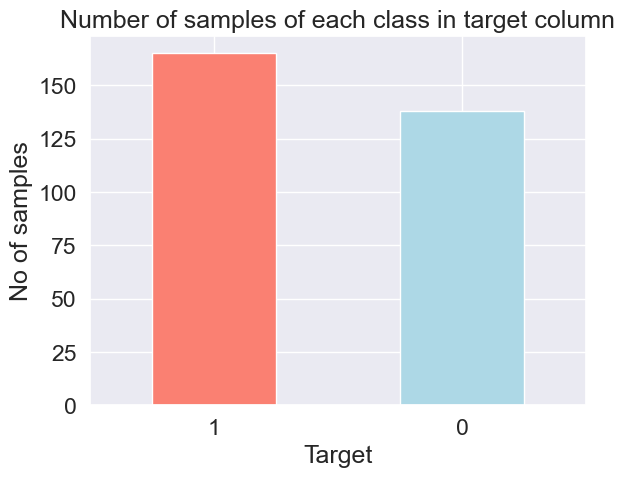

In [ ]:
# Better visualization of the balance
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Number of samples of each class in target column")
plt.xlabel("Target")
plt.ylabel("No of samples")
plt.xticks(rotation=0);

In [ ]:
# Check for more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values and all columns are numerical.

In [ ]:
# Set pandas display option to format floats to 3 decimal places
pd.set_option('display.float_format', '{:.3f}'.format)

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


Gaining insights about how different independent variables interact with the dependent variable.

### Heart Disease Frequency according to Gender


In [ ]:
data_dictionary["sex"]

'Displays the gender of the individual using the following format : 1 = male 0 = female.'

In [ ]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

There are 207 males and 96 females in the study.

In [ ]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Since there are about 100 women and 72 of them have a positive value as target (which means that they have heart disease), we might infer (based on `sex` variable) if the participant is a woman, there is an approximative 75% chance she has heart disease.

For males, there are about 200 males in total with around half indicating a presence of heart disease. Therefore, we might predict, if the participant is male, approximative 50% of the time he will have heart disease.

Averaging these two values, one can assume (based on these 2 parameter) that there is a 62.5% chance a person has heart disease.

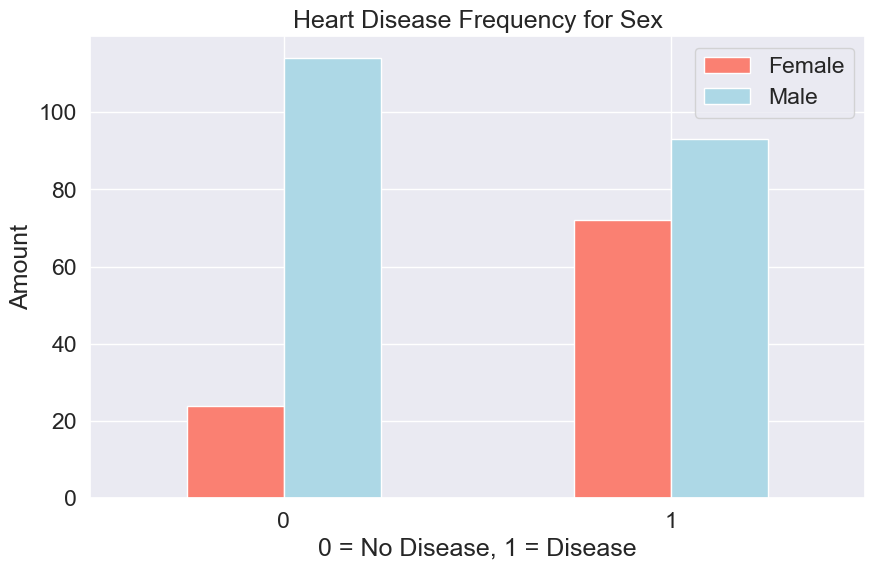

In [ ]:
# Creating a plot of crosstab for better visualization
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                          figsize=(10, 6),
                                          color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

It is cleary visible that there is a pronunced tendency of heart disease among women than among men.

In [ ]:
# Checking for other relevant variables to be compared
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [ ]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [ ]:
data_dictionary["thalach"]

'Max heart rate achieved : displays the max heart rate achieved by an individual.'

Combining indepenednt variables (`age` and `thalach`) and comparing them to the target variable.

### Age vs Max Heart Rate for Heart Disease

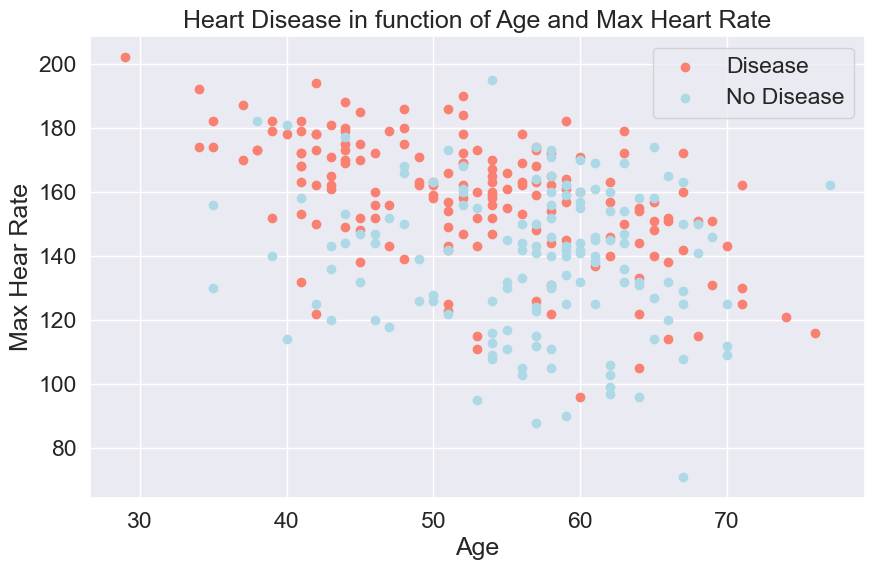

In [ ]:
# Creating another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"]== 1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"]== 0],
            c="lightblue")

# Add some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Hear Rate")
plt.legend(["Disease", "No Disease"]);

It seems the younger a person is, the higher their max heart rate (dots are higher on the left part of the graph) and the older someone is, there are more blue dots. Also it may be noted that there are more dots all together on the right side of the graph (among older participants).

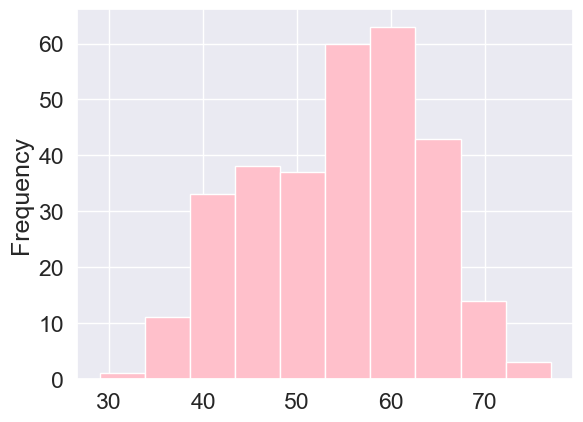

In [ ]:
# Check the distribution of the "age" column with a histogram
df["age"].plot.hist(color="pink");

It can be observed that the age follows a **normal distribution** but slightly swaying to the right (fact reflected in the scatter plot).

### Heart Disease Frequency per Chest Pain Type (`cp`)

In [ ]:
data_dictionary["cp"]

'Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic.'

In [ ]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


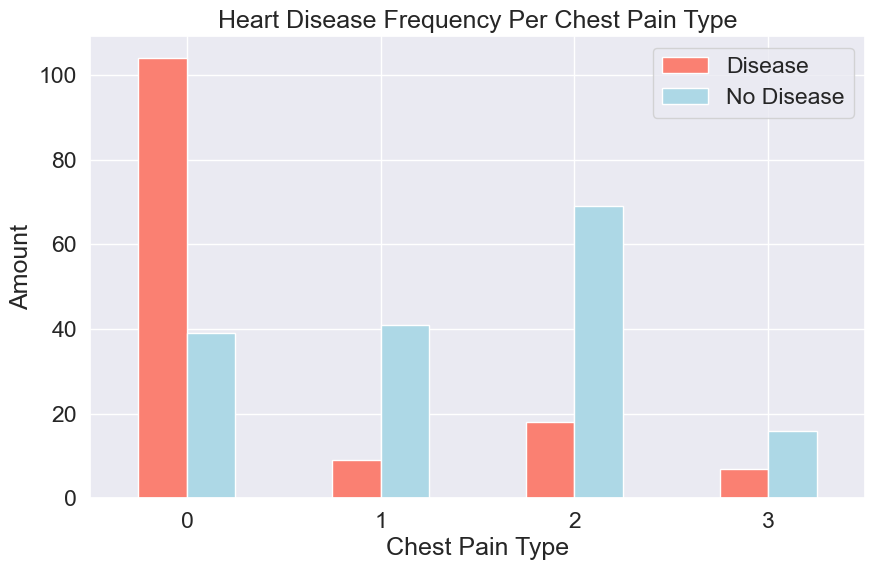

In [ ]:
# Creating a plot for crosstab
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["salmon", "lightblue"])

# Adding some additional info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

From the data dictionary:

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

An interesting fact is the value 1 (corresponding to atypical angina) states it is not related to the heart but seems to have a higher ratio of participants with heart disease than not (same observation for value 2).

This is not conclusive.

### Correlation between independent variables (using a Correlation Matrix)

This may provide an idea of which independent variables may or may not have an impact on the target variable.

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)

# Creating a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000,-0.098,-0.069,0.279,0.214,0.121,-0.116,-0.399,0.097,0.210,-0.169,0.276,0.068,-0.225
sex,-0.098,1.000,-0.049,-0.057,-0.198,0.045,-0.058,-0.044,0.142,0.096,-0.031,0.118,0.210,-0.281
cp,-0.069,-0.049,1.000,0.048,-0.077,0.094,0.044,0.296,-0.394,-0.149,0.120,-0.181,-0.162,0.434
trestbps,0.279,-0.057,0.048,1.000,0.123,0.178,-0.114,-0.047,0.068,0.193,-0.121,0.101,0.062,-0.145
chol,0.214,-0.198,-0.077,0.123,1.000,0.013,-0.151,-0.010,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.121,0.045,0.094,0.178,0.013,1.000,-0.084,-0.009,0.026,0.006,-0.060,0.138,-0.032,-0.028
restecg,-0.116,-0.058,0.044,-0.114,-0.151,-0.084,1.000,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.137
thalach,-0.399,-0.044,0.296,-0.047,-0.010,-0.009,0.044,1.000,-0.379,-0.344,0.387,-0.213,-0.096,0.422
exang,0.097,0.142,-0.394,0.068,0.067,0.026,-0.071,-0.379,1.000,0.288,-0.258,0.116,0.207,-0.437
oldpeak,0.210,0.096,-0.149,0.193,0.054,0.006,-0.059,-0.344,0.288,1.000,-0.578,0.223,0.210,-0.431


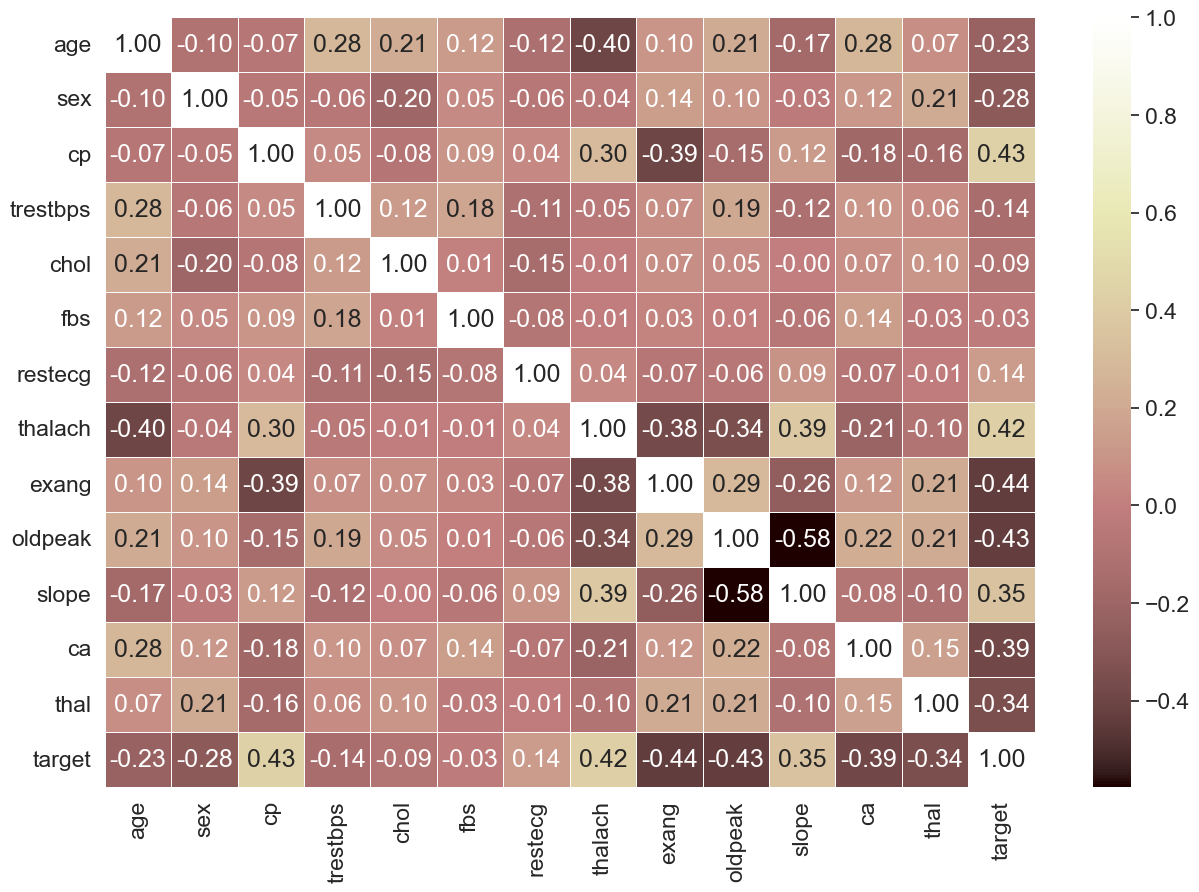

In [ ]:
# Making the correlation matrix more visual using seaborn
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="pink");

A higher positive value means a positive correlartion and a higher negative value means a potentials correlation.

Potential positive correlation:
* cp
* thalach
* slope

Potential negative correlation:
* exang
* oldpeak

Aside from the deduction using `sex` variable, the rest of the data seems to be pretty distributed.

So the next step is using machine learning models to drive the next questions.

## 5. Modelling

What one aims for:

Question to be answered:
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Evaluation metric:
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In [ ]:
# Data check
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In order to predict the target variable using all of the other variables, the target variable has to be split from the rest.

In [ ]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# Independent variables (no target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2


In [ ]:
# Targets
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

The next step contains the splitting of data into a **training set** and a **test set**.

The training set will be used to train the model and the test set to test it (the test set remains separate from the training set).

Here, 80% of the data is training data and the other 20% is the test data.

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.000,2,0,2
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3
196,46,1,2,150,231,0,1,147,0,3.600,1,0,2
75,55,0,1,135,250,0,0,161,0,1.400,1,0,2
176,60,1,0,117,230,1,1,160,1,1.400,2,2,3


In [ ]:
y_train.head(), len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
 Name: target, dtype: int64,
 242)

Now that the data was split into training and test sets, it is time to build a machine learning model.

The model will be trained (find the patterns) on the training set and will be tested (use the patterns) on the test set.

#### Model choices
Trying 3 different machine learning models:
1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors Classifier - `KNeighboursClassifier()`
3. Random Forest Classifier  - `RandomForestClassifier()`

These models have been chosen using
[Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/machine_learning_map.html) .


Since the chosen algorithms implement the same methods for fitting them to the data as well as evaluating them, they will be put in a dictionary and a function which fits and scores them will be created.

In [ ]:
# Put models into a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and scoare models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Create a dictionary to memorise model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and add the score to the dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\simon\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

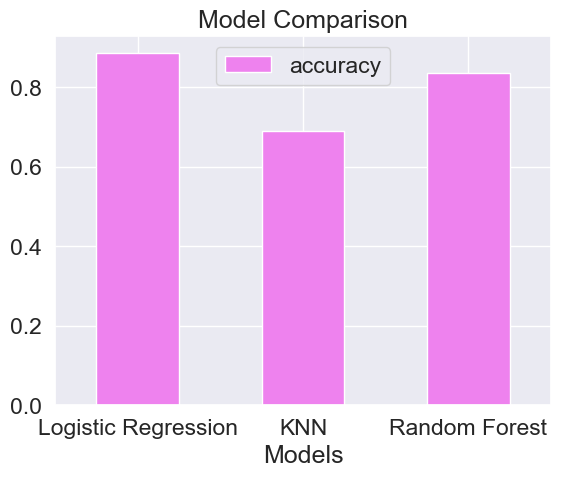

In [ ]:
# Converting the dictionary to a DataFrame
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="violet");
plt.xticks(rotation=0)
plt.title("Model Comparison")
plt.xlabel("Models")
plt.legend(loc="upper center");

Looking at the scores, the `LogisticRegression()` model performs the best.
Now, the baseline model is setup.

Looking at the following:
* **Hyperparameter tuning**
* **Feature importance**
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC (Receiver Operating Characteristic) curve
* Area under the curve (AUC)

### Hyperparameter tuning

#### Tune KNeighborsClassifier(KNN) by hand

Tuning the main hyperparameter for K-Nearest Neighbors (KNN) algorithm, the number of neighbours (the default is 5, `n_neighbors=5`).

In [ ]:
# Tuning KNN

# Create lists for train and test scores
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
# Checking the obtained train scores
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
# Checking the test scores
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


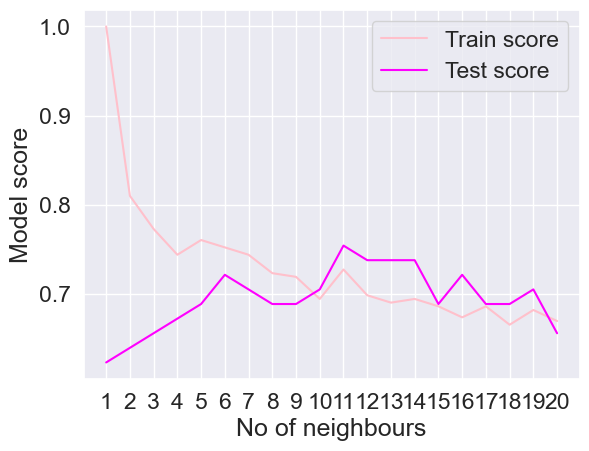

In [ ]:
# Better way to visualize the obtained scores
plt.plot(neighbors, train_scores, label="Train score", color="pink")
plt.plot(neighbors, test_scores, label="Test score", color="magenta")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("No of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

It may be observed that for `n_neighbors=11`, the model's score increased to 0.7541 compared to the default value of n_neighbors=5 with accuracy 0.6885.

However, this new score does not exceed the Logistic's Regression or Random Forest Classifier's score. Hence, one will not move forward with "KNN" model.

#### Tuning models with `RandomizedSearchCV`

Models to be tuned:
* LogisticRegression()
* RandomForestClassifier()

Reading the Scikit-Learn documentation for the above mentioned models, one finds there is a number of different hyperparameter to be tuned.

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
                "C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {
            "n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Grids are setup for each of our models, therefore they may be tuned using RandomizedSearchCV.

The different hyperparameters from `log_reg_grid` are passed to RandomizedSearchCV and the parameter `n_iter` is set to 20 meaning that the function will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [ ]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# Show the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
# Evaluate the randomized model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Tuning the `RandomForestClassifier` using `RandomizedSearchCV`.

In [ ]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

Tuning the hyperparameters for each model saw a slight performance boost in both `RandomForestClassifier` and `LogisticRegression`.

However, `LogisticRegression` still has the best score so it will be tuned further with `GridSearchCV`.

#### Tuning model with `GridSearchCV`

Since the Logistic Regression model provides the best score so far, the next step implies improving it again using GridSearchCV.

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
     "solver": ["liblinear"]
}

# Setup grid hyperparameter search for LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In this case, the resukts are the same as before since the grid has a maximum of 20 different hyperparameters combinations.

Hence, one moves forward with the next step: evaluation of the model in order to obtain the needed metrics.

### Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve & AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

...cross-validation is used where possible.

Making predictions is needed in order to compare and evaluate the trained model.

In [ ]:
# Make predictions with tuned model on the test data
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### ROC curve & AUC score

=> comparing the true positive rate to the false positive rate.

In this case, the GridSearchCV version of `LogisticRegression` estimator (gs_log_reg) is used.

<Figure size 1200x1000 with 0 Axes>

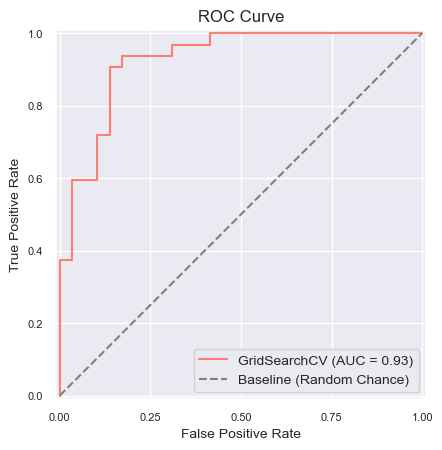

In [ ]:
# Plot ROC curve & calculate AUC metric
# from_estimator() = use a model to plot ROC curve on data
plt.figure(figsize=(12,10))
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test,
                               color="salmon");
# Add a baseline (random chance) line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Baseline (Random Chance)');

# Adjust the font sizes
plt.xlabel('False Positive Rate', fontsize=10)  # Set x-label font size
plt.ylabel('True Positive Rate', fontsize=10)   # Set y-label font size
plt.title('ROC Curve', fontsize=12)             # Set title font size
plt.xticks(fontsize=8)                          # Set x-tick label font size
plt.yticks(fontsize=8)                          # Set y-tick label font size

# Adjust legend font size
plt.legend(fontsize=10)

# Display the plot
plt.show();

The picture above shows that the model does far better than guessing. However, a perfect model would achive an AUC score of 1.0, so there is still room for improvement.

#### Confusion matrix

=> visual way to show where the model made the right predictions and where it make the wrong ones.

In [ ]:
print(confusion_matrix(y_test, y_preds));

[[25  4]
 [ 3 29]]


In [ ]:
# Make the confusion matrix more visual with Seaborn's heatmap()
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False, cmap="cool")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

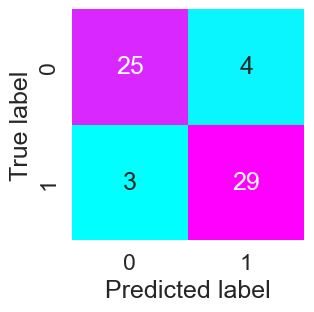

In [ ]:
plot_conf_mat(y_test, y_preds);

It may be noticed that the model gets "confused" (predicts the wrong label) relatively the same across both classes. In essence, there are 4 ocassions where the model predicted 1 when it should have been 0 (salse positive) and 3 occasions where the model predicted 0 instead of 1 (false negative).

#### Classification Report

In [ ]:
# Classification Report of predictions made only on the X_test
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Even if deeper insights on the model have been produced, these were all computed using a single training and data set.

Movig forward with computing more solid results using cross-validation.

### Calculate evaluation metrics using cross-validation

Using `cross_val_score()` to calculate accuracy, precision, recall and f1-score for the tuned model (the best model along with the best hyperparameters).

In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

Sincer there are 5 metrics, one takes the average.

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

Doing the same for all other classification metrics.

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [ ]:
# Cross-validated f1-score
cv_f1_score = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1")

cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1-score": cv_f1_score},
    index=[0]
)
cv_metrics = cv_metrics.T
cv_metrics

,0
Accuracy,0.845
Precision,0.821
Recall,0.921
F1-score,0.867


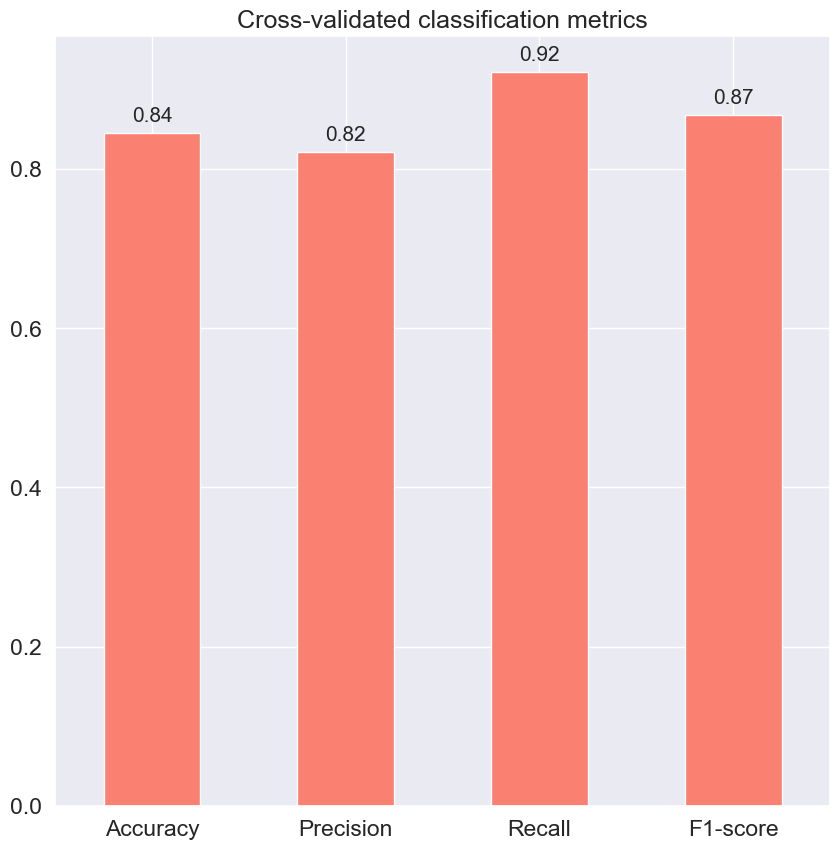

In [ ]:
ax = cv_metrics.plot.bar(title="Cross-validated classification metrics", legend=False, color="salmon", figsize=(10, 10))
plt.xticks(rotation=0)

# Adding annotations on the bars
for i, value in enumerate(cv_metrics[0]):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=15)

# Show the plot
plt.show()

The model performs the best for Recall and f1-score.

The final thing to check off the list of the model evaluation is feature importance.

### Feature Importance

"Which features contributed most to the outcomes of the model and how did they contribute?"

For this problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Due to the fact that the used model is `LogisticRegression`, one way of fining out which features are important is using `coef_` attribute (coefficient of the features in the decision function).

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [ ]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

These values represent how much each feature contributed to how a model makes a decision on whether patterns in a sample of patient's health data leans more towards having heart disease or not.

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

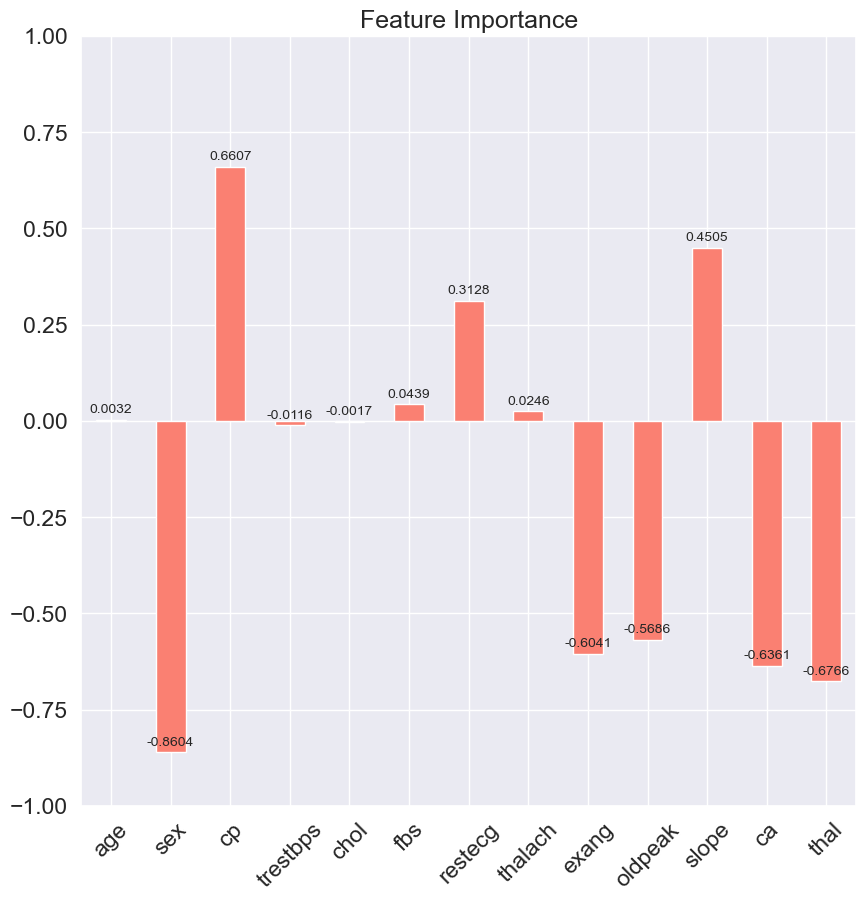

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df = feature_df.T


ax = feature_df.plot.bar(title="Feature Importance", legend=False, color="salmon", figsize=(10, 10))
plt.xticks(rotation=45)

# Adding annotations on the bars
for i, value in enumerate(feature_df[0]):
    ax.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

plt.ylim(-1, 1)
plt.show();

The larger the value, the more the feature contributed to the models decision.

If the value is negative, it means that there is a negative correlation (and vice versa for positive values).

In [ ]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


For example, the `sex` attribute has a negative value of -0.8604, which means as the value for `sex` increases, the `target` value decreases. The implication of this is:
* Males (coded as 1) are less likely to have heart disease (higher value of sex correlates with a lower value of target).
* Females (coded as 0) are more likely to have heart disease (lower value of sex correlates with a higher value of target).

When `sex` is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (`target` = 1) than without.

And then as `sex` increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
data_dictionary["slope"]

'Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart.'

According to the model, there is a positive correlation of 0.4505, not as strong as `sex` and `target` but still considerable.

This positive correlation means the model is picking up the pattern that as `slope` increases, so does the `target` value.

As it may be observed in the data above, as `slope` goes up, so does `target`.

## 6. Experimentation

In this case, we didn't. The highest accuracy our model achieved was below 90%.

Considering that the evaluation metric has not been hit yet, there are some questions one may ask..

* Could one collect more data?
* Could one try a better model?
* Could one improve the current models? (beyond what it has been done so far)

In [4]:
# Checking the python version
!python --version

Python 3.10.12


In [ ]:
# Generating the list with all installed packages
!pip freeze > requirements.txt